
# CLASSIFYING CIFAR-10 IMAGES (CIFAR-10) USING CNNs

**I achieved a training accuracy of 93.70% (epochs = 50) after adjusting some of the CNN's architecture. On testing (epochs = 50) the model achieved 76.8% accuracy which leads me to believe there may be some over-training.** 

**I added some image augmentations but that did not seem to help with the accuracy.** 




# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
pip install visualkeras --upgrade #Used for visualizing the CNN architecture. https://github.com/paulgavrikov/visualkeras/

Requirement already up-to-date: visualkeras in /usr/local/lib/python3.6/dist-packages (0.0.1)


In [2]:
import visualkeras #Used for visualizing the CNN architecture. https://github.com/paulgavrikov/visualkeras/
from tensorflow.keras.utils import plot_model #https://www.machinecurve.com/index.php/2019/10/07/how-to-visualize-a-model-with-keras/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import cifar10 #imports the cifar10 dataset (very well known and used dataset)
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #this assigns the X and y values and downloads the data

In [4]:
#see the shape of the dataset
X_train.shape

(50000, 32, 32, 3)

There are 50,0000 images with width = 32, height = 32 and 3 channels (since it's a color image...RGB)

In [5]:
X_test.shape

(10000, 32, 32, 3)

10,000 images with width, height, channels = 32, 32, 3.

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[4]


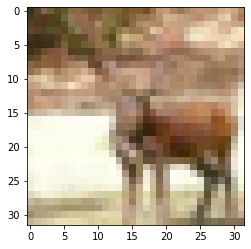

In [8]:
i = 1001
plt.imshow(X_train[i]) #show the image at index [1001] location
print(y_train[i]) #prints the class (label) of the image. So if [4], go to Problem Statement above (ref. the classes) and count index 4...it's a deer.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


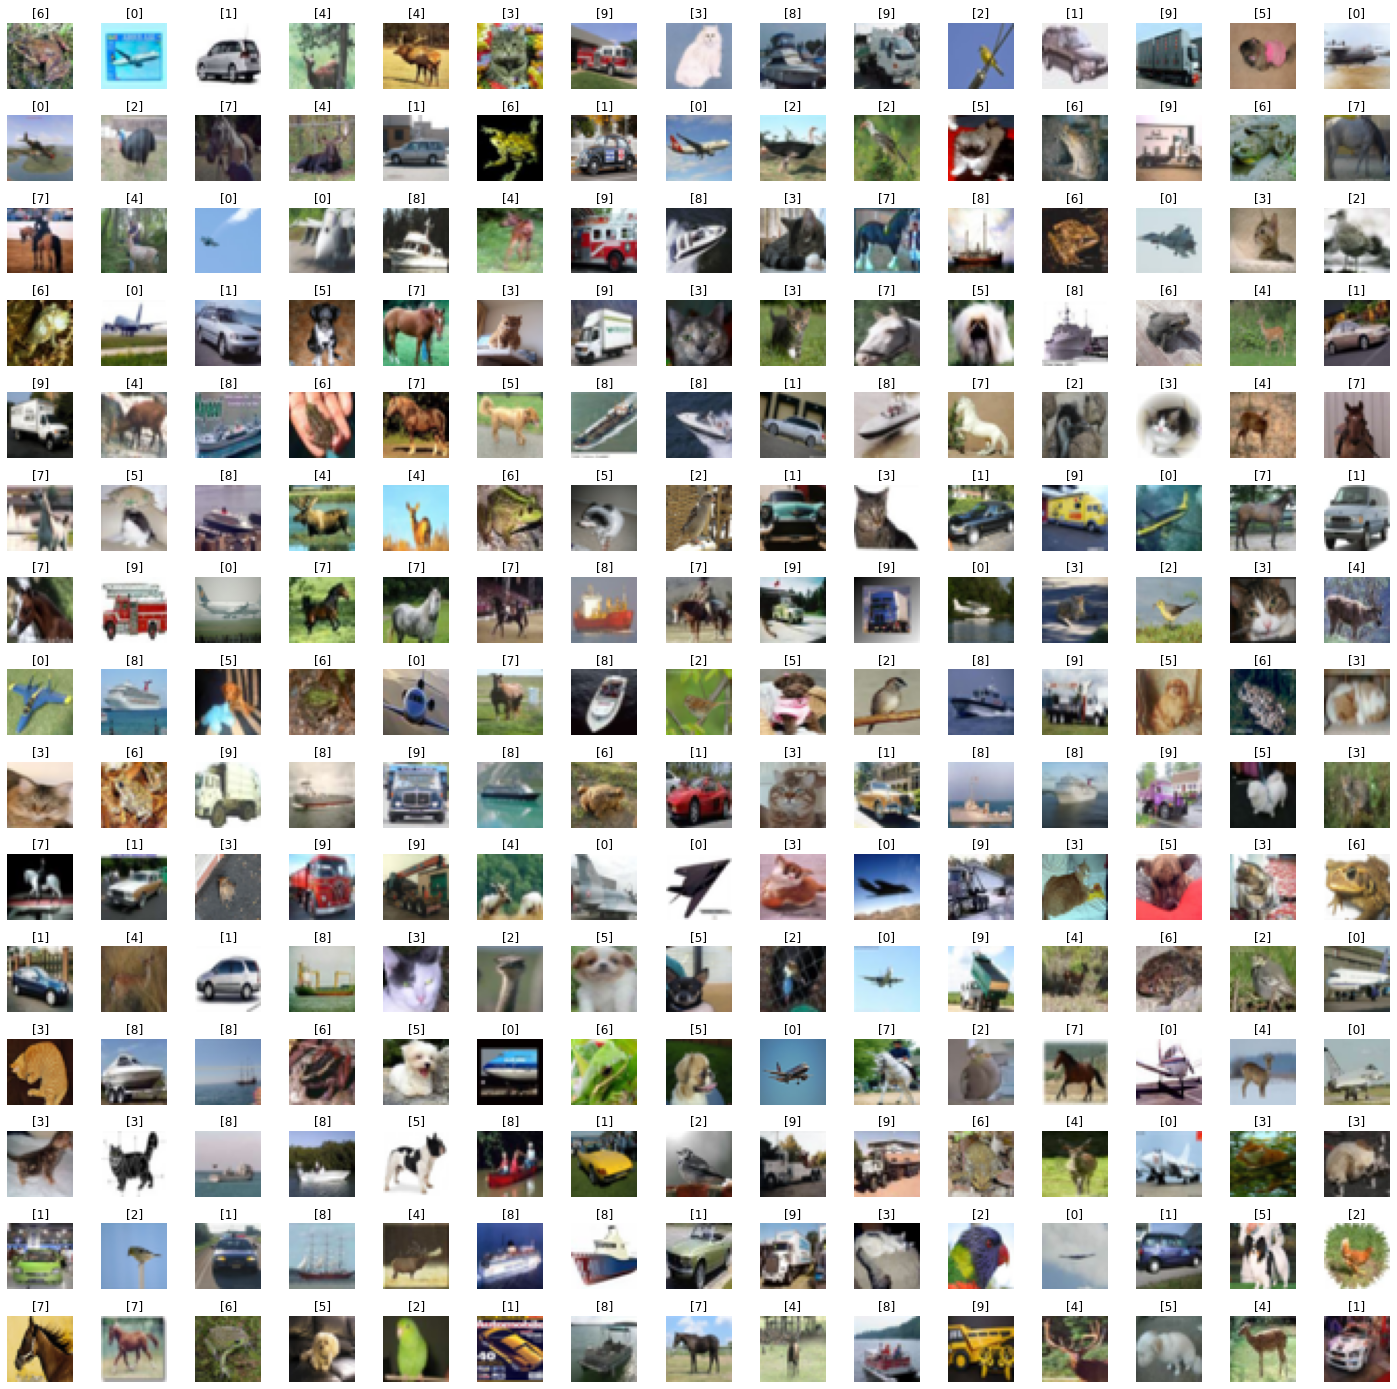

In [9]:
#create a grid of images
W_grid = 15 #width of grid (15 images wide)
L_grid = 15 #length of grid (15 images long)

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #fig meaning figure
axes = axes.ravel()  #ravel simply flattens the 15 x 15 matrix into 225 arrays.

n_training = len(X_train)

#create a for loop to plot a random image in each of the grid locations/plots above
for i in np.arange(0, L_grid  * W_grid): #creates an array from 0 - 255...255 is from L_grid * W_grid; 0, 1, 2, 3, .....255
  index = np.random.randint(0, n_training) #creates a random integer between 0 and 50,000
  axes[i].imshow(X_train[index]) #plot image w/in the X_train that has the random index
  axes[i].set_title(y_train[index]) #adds the target class as a label (example: 1st image title is [5] pertaining to Dogs)
  axes[i].axis('off') #turns off axes labels since we don't need them. We know each image is 32 x 32 pixels.
plt.subplots_adjust(hspace = 0.4)  #sets the horizontal space (hspace) between images so they're not so cramped together.

In [10]:
n_training

50000

In [11]:
#create a for loop to plot a random image in each of the grid locations/plots above
for i in np.arange(0, L_grid  * W_grid): #creates an array from 0 - 255...255 is from L_grid * W_grid; 0, 1, 2, 3, .....255
  index = np.random.randint(0, n_training) #creates a random integer between 0 and 50,000
  axes[i].imshow(X_train[index]) #plot image w/in the X_train that has the random index
  

# STEP #3: DATA PREPARATION

In [12]:
#convert images to float type so we can use them later as a float format
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
#how many classes do I have
number_cat = 10 #10 categories

In [14]:
y_train #the classes are shown below (they are in decimal form; need to convert to binary values); 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

**Above**: Our y_train contains index values (ex: [6]) in decimal format and they need to be in binary format. Example: convert [6] to 000000001.


In [15]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat) #changing y_train classes from a decimal format to a binary format. 

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

y_train is now in binary format. [9] has been changed to 010000000 >>> [0., 1., 0., ..., 0., 0., 0.]

In [17]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## Data Normalization

Next, data normalization. in X_train, we had numbers from 0-255 (colors per RGB channel). We want this to be from 0-1.

At the beginning of Step 3 we did the float conversion....below you'll see why.

In [19]:
X_train = X_train/255 #This changes the values to be between 0 and 1.
X_test = X_test/255   #This changes the values to be between 0 and 1.

In [20]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:

X_train.shape

(50000, 32, 32, 3)

In [22]:
#Slicing only the dimensions (32, 32, 3) from the X_train.shape (exclude the 50,000)
Input_shape = X_train.shape[1:]

In [23]:
Input_shape #shows only the dimensions

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

## Part 1: Build the Model

Build in sequential form.

In [24]:
from keras.models import Sequential #Keras is an API that sits on top of TensorFlow
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

**Line 1**: from keras.models import Sequential

from keras.models import Sequential #Keras is an API that sits on top of TensorFlow. We'll build out model from the left to the right. 

**Line 2**: from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

Conv2D: Performs convolution process

MaxPooling2D: Obtains the maximum of the pixles from our filter. Downsampling - reduces the dimensionality of the images; compressing the features

AveragePooling2D: Average the values of the pixels within the filter.

Dense: Use Dense to create our fully connected atrificial neural network

Flatten: Flattens array; flatten feature maps to one array of neurons

Dropout: Perform some regularization (dropping a couple neurons and their weights) to improve the generalization capability of the network. 

**Line 3**: from keras.optimizers import Adam 

Adam optimizer: To perform optimization and obtain the weights of the network

**Line 4**: from keras.callbacks import TensorBoard

Callbacks: Use TensorBoard in the backend when we train the network.

***Let's build the model using Keras. Note: If using Tensorflow, it's quite different & more complex.*** 

In [25]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape ))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

#Adding two more convolution layers and MaxPooling and Dropout.
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
#add the fully connected artificial neural network
cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))

#Build last layer (output layer) in the network:
cnn_model.add(Dense(units = 10, activation = 'softmax'))


**Line 2**: cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape ))

Builds 1st convolutional layer.
filters = 64; filter dimensions (aka, kernel size) kernel_size = (3,3) (means 3x3 matrix for filter size), activation function = 'relu'; input_shape = Input_shape (from above...(32, 32, 3) which are the dimensions of the images

**Line 3**:cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

Adds another convolutional layer. Do NOT need to specify input_layer as we already did that. The 2nd CNN layer' inputs are inherited from the outputs of the 1st layer. 

**Line 4**: cnn_model.add(MaxPooling2D(2,2))

Adds a max pooling layer. (MaxPooling2D(2,2) meaning we're doing to downsample to a size of 2x2.

**Line 5**: cnn_model.add(Dropout(0.4))

We'll dropout 40% of the neurons along with their weights.

**Lines 8-11**: This adds to more convolution layers, MaxPooling & Dropout. 

**Line 13**: cnn_model.add(Flatten())

After convolutions, we perform flattening.

**Line 15**: cnn_model.add(Dense(units = 512, activation = 'relu')

Need to specify the # or neurons in the hidden (Dense) layer = Dense(units = 1024)
activation = 'relu'

*We will not add dropouts.

**Line 16**: cnn_model.add(Dense(units = 1024, activation = 'relu')

Adds a 2nd hidden layer. 

**Line 19**:

Specify the # of units in this output layer: We're going to classify the data into 10 classes so output has to have 10 values. units = 10

activation function = 'softmax' activation fxn since output has to be either zeros or ones (0 or 1)

In [26]:
pip install visualkeras --upgrade

Requirement already up-to-date: visualkeras in /usr/local/lib/python3.6/dist-packages (0.0.1)


### Visualizing The CNN Model

As you can see below, the 1st two yellow layers are the 2 convolutional layers. The next red layer is the MaxPooling layer followed by the green layer which is the dropout layer. The next pair of yellow layers with the red and green layers repeated is the 2nd set of convuluationl layers. The blue layer is the FLATTEN layer followed by the 2 dark blue/black Dense (hidden) layers and fainlly the output layer. 

In [27]:
visual_model = cnn_model

visualkeras.layered_view(visual_model).show() # display using your system viewer
visualkeras.layered_view(visual_model, to_file='output.png') # write to disk
visualkeras.layered_view(visual_model, to_file='output.png').show() # write and show

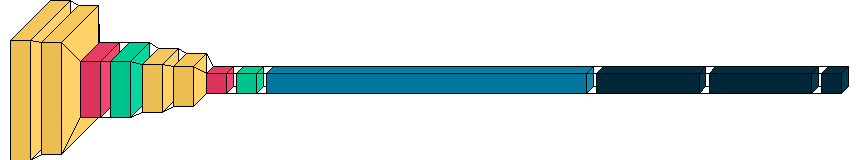

In [28]:
visualkeras.layered_view(visual_model) #default style

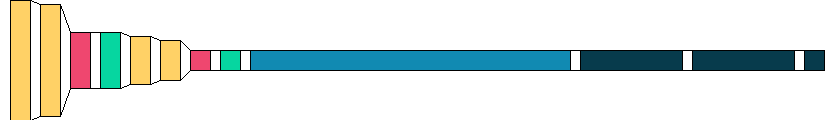

In [29]:
#flat style
visualkeras.layered_view(visual_model, draw_volume=False)

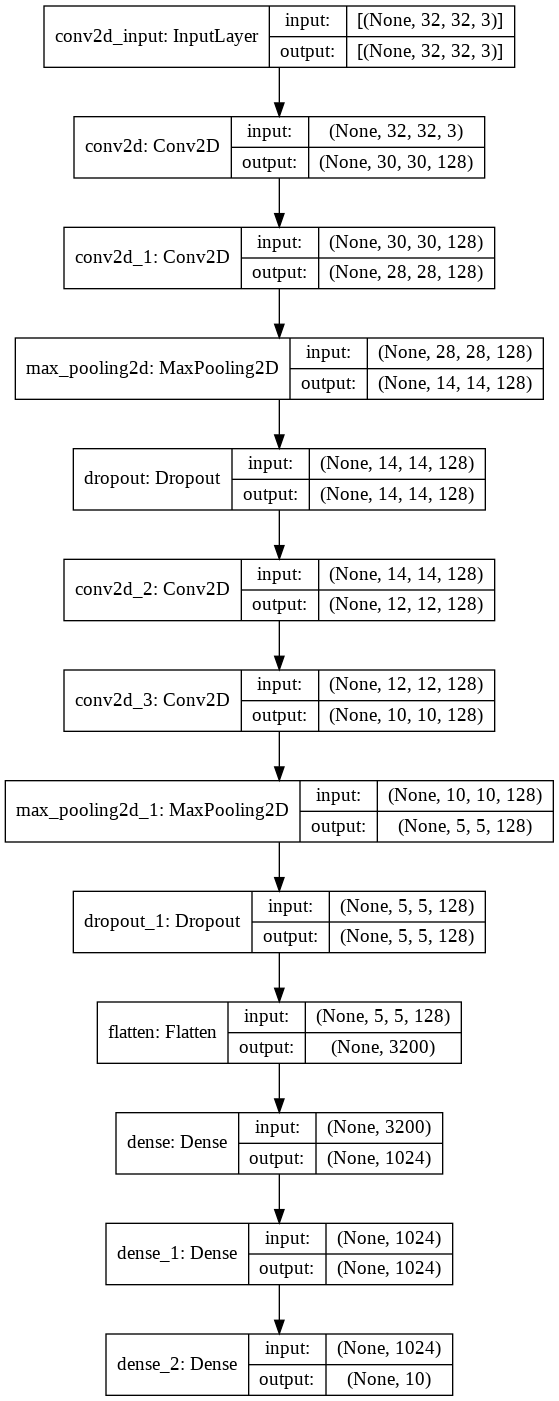

In [30]:
plot_model(visual_model, show_shapes = True, rankdir='TD', expand_nested = False, to_file='model.png') #rankdir...use 'TD' for vertical output (recommended) or 'LR' for horizontal.

## Part 2: Compiling the Model & Fitting To The Training Data

In [31]:
# Compiling the model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

**Line 2**: 

loss: we're using a categorical model so we need categorical cross-entropy: loss = 'categorical_crossentropy'

optimizer: we can use adam or root mean square optimizer with a learning rate (lr) = 0.001. 0.001 means how fast the network will be trained. 

metrics: metrics = ['accuracy']


In [32]:
# The model is built and now for the fitting the TRAINING data to the model. 
history = cnn_model.fit(X_train, y_train, batch_size = 164, epochs = 50, shuffle = True)

Epoch 1/50
305/305 [==============================] - 12s 33ms/step - loss: 2.2953 - accuracy: 0.1870
Epoch 2/50
305/305 [==============================] - 10s 33ms/step - loss: 1.5162 - accuracy: 0.4562
Epoch 3/50
305/305 [==============================] - 10s 33ms/step - loss: 1.2068 - accuracy: 0.5763
Epoch 4/50
305/305 [==============================] - 10s 33ms/step - loss: 0.9881 - accuracy: 0.6567
Epoch 5/50
305/305 [==============================] - 10s 34ms/step - loss: 0.8338 - accuracy: 0.7129
Epoch 6/50
305/305 [==============================] - 10s 34ms/step - loss: 0.7218 - accuracy: 0.7540
Epoch 7/50
305/305 [==============================] - 10s 34ms/step - loss: 0.6410 - accuracy: 0.7765
Epoch 8/50
305/305 [==============================] - 10s 34ms/step - loss: 0.5733 - accuracy: 0.7981
Epoch 9/50
305/305 [==============================] - 10s 34ms/step - loss: 0.5338 - accuracy: 0.8164
Epoch 10/50
305/305 [==============================] - 10s 34ms/step - loss: 0.498

I played around with the architecture:
 
1) accuracy score of 71.36% with these settings: epochs = 5, batch_size = 164, filters = 128 in both convolutional layers, dropout = 0.4 for both layers, neurons = 1024 in both Dense layers. 
 
2) accuracy = 89.40% using the same inputs above but with epochs = 20, each epoch takes ~10 seconds on a Google Colaboratory GPU.
 
3) accuracy = 93.70% w/same inputs above but epochs = 50. 
 
Very cool!

**Line 2**: history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

**On Google Colab (standard/default runtime):  ~ 9 minutes to do ONE epoch**

**With a GPU runtime it takes only a few seconds!** 

history: an object or variabe that will be capturing all the progression of the network as it's being trained. All the values of the root mean squared (RMS), validation, accuracy, how the netowrk is being trained. 

batch_size = 32...meaning 32 images will be fed to the network at once. 

epochs: start with 1 or 2:  if using cloud-computing, can do more epochs but if local computer and CPU, it'll take a very long time to train so do fewer epochs. 

shuffle:  means to shuffle the images; we want the network to be exposed to a different order of images (not just one image class (i.e., dogs) at a time). It allows the network to generalize better. 

## Saving the Model in Google Colab

In [33]:
cnn_model.save("trained_model_cifar.h5")

# STEP #5: EVALUATE THE MODEL USING TESTING DATA

In [34]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.8664 - accuracy: 0.7685
Test Accuracy: 0.7684999704360962


**Line 2**: print('Test Accuracy:', {}.format(evaluation[1]))

Use [1] to only print the accuracy component of the evaluation. There's also a the validation but we don't need to see that. 

--------------

After epochs = 50 for training, I achieved a Testing accuracy of: 

**Test Accuracy: 81.00%**


## Predicting The Classes In The Test Set

Now I'll feed the test images into the trained model (cnn_model) and the model will predict the classes for each TEST image. 

In [35]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 8, ..., 5, 1, 7])

**Results**: array([5, 1, 0, ..., 5, 1, 7])

You cannot see all the predictions as there are 10,000 but above you can see some of the results in decimal format. 

Let's see how the predicted classes for the TEST set compare to the ACTUAL values (the true y_test values). Recall that we did a conversion of the y_test from decimal to a binary format. Example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] is binary for [4] which is really class 'deer' (I'm making this up).

* Need to convert y_test back to the class decimal value. 

In [36]:
y_test #values are in binary format (example: 0,0,0,0,0,0,0,0,0,1) & need to convert back to a decimal for the class (ex: [4])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [37]:
y_test = y_test.argmax(1) #converts y_test back to the decimal values from current binary values.


In [38]:
y_test # now we see the class predictions in a decimal format [3, 8, 8...., 5, 1,7]

array([3, 8, 8, ..., 5, 1, 7])

## Plotting the Results

Plotting the image, prediction and the True class.

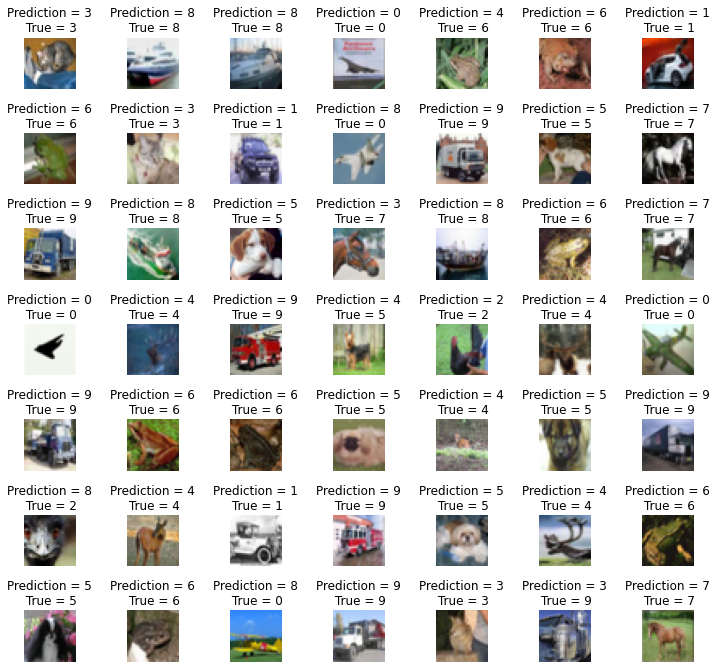

In [39]:
#This is the same as above (at the start of the code)
L = 7 #length
W = 7 #width
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i]) #this is the image
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i])) #this is the prediction and True is the True value. \n means new line
  axes[i].axis('off') #removes tick marks for axes

plt.subplots_adjust(wspace = 1) #provides more spacing between images


## Creating a Confusion Matrix

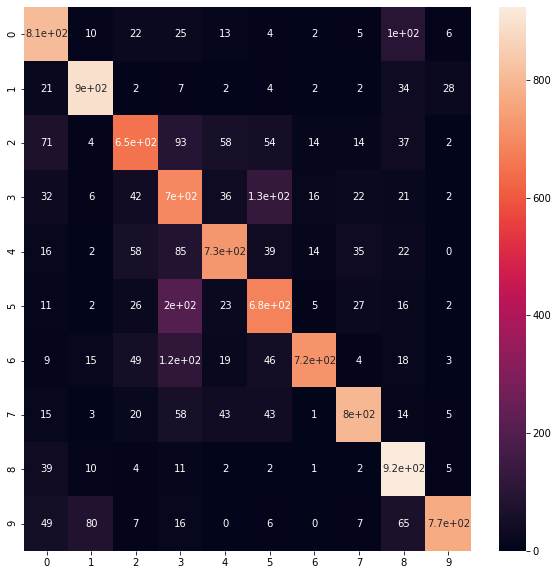

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes) #want to plot y_test (true results) vs. predicted results (predicted_classes)
cm #shows the 10 x 10 confusion matrix as an array.Not very nice to look at though.
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True) #Seaborn has a much better plot..the heatmap plot.

**Heatmap Interpretation**:  The rows are PREDICTIONS and the columns are the ACTUAL values. Any values outside of the diagonal are misclassifications (errors). Some are very hard to see. Our model is doing GREAT though!

# STEP #6: SAVING THE MODEL IF NOT USING GOOGLE COLAB

**Step 6 is for those running this on their local computer.** ***If you're running Google Colab, your model has already been saved with the code in Step 4 subsection "Saving the Model in Google Colab". ***

We've done a lot of training on the model (cnn_model). cnn_model is where all the experience, optimized weights and training is captured.

In [41]:
import os #operating system
directory = os.path.join(os.getcwd(), 'saved_models') #cwd means current working directory; 'saved models' is the folder we want to create and save to.

if not os.path.isdir(directory): #if there is no directory called 'saved model' in this path..
  os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

These augmentations help improve generalization of the model so it can make better predictions.We'll create many versions of the original images and use them in the training data. This is extremely powerful since the model has seen many variations of the images. 

## STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

**Section 7.1 was ultimately skipped from running since section 7.2 is the actual code we want to run to trian the model on a lot of modified images. I commented out the code in section 7.1 so it doesn't run.**

In [42]:
#import keras
#from keras.datasets import cifar10
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [43]:
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')


In [44]:
#X_train.shape

In [45]:
#n = 15 #8 images
#X_train_sample = X_train[:n] #get 8 training images as a sample


In [46]:
#sample.shape #output is (8, 32, 32, 3) which means 8 images at 32x32px each and 3 color bands (Red, Green, Blue; RGB)

In [47]:
#create image data generators; these are applied to random images
#from keras.preprocessing.image import ImageDataGenerator
#datagen_train = ImageDataGenerator(rotation_range = 90)
#dataget_train = ImageDataGenerator(vertical_flip=True)
#dataget_train = ImageDataGenerator(height_shift_range=0.5)
#dataget_train = ImageDataGenerator(brightness_range=(1,3))
#datagen_train.fit(X_train_sample)

**Line 3**: datagen_train = ImageDataGenerator(rotation_range = 90)

(rotation_range = 90) means rotate image randomly between 0 and 90 degrees.

**Line 4**: dataget_train = ImageDataGenerator(vertical_flip=True)

**Line 5**:dataget_train = ImageDataGenerator(height_shift_range=0.5)

**Line 6**:dataget_train = ImageDataGenerator(brightness_range=(1,3))



In [48]:
#from PIL import Image


In [49]:
#fig = plt.figure(figsize = (20,2))

#for x_batch in datagen_train.flow(X_train_sample, batch_size = n):
  #for i in range(0,n):
    #ax = fig.add_subplot(1, n, i+1)
    #ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
  #fig.suptitle('Augmented images (rotated 90 degrees)')
  #plt.show()
  #break;

**for loop interpretation:** go to batch which is a newly generated image, create a for loop, print all images in that batch. 


**Line 3**: for x_batch in datagen_train.flow(X_train_sample, batch_size = n):


Apply flow method and pass along X_train_sample. batch_size = n (which is 8).
Get training samples and create a flow of images...call them batches in 8 images. Each of them will be rotated/augmented somehow. 

**Line 4**: for i in range(0,n):

Plots all images in the batches. 

**Line 5**: ax = fig.add_subplot(1,n,i+1)

specify 1, n, i+1....go to subplot in location 1, 8 (1 row with 8 columns/images); when i = 0, in 1st location plot the 1st image. 

**Line 6**: ax.imshow(Image.fromarray(np.uint8(x_batch[i])))



## STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [50]:
from keras.preprocessing.image import ImageDataGenerator

In [51]:
datagen = ImageDataGenerator(featurewise_center=True, channel_shift_range = 0.1, zoom_range = 0.2, rescale=1./255, shear_range=0.2)

**Line 1**: All of these image changes will happen at the same time. 

In [52]:
datagen.fit(X_train)

In [53]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 96), epochs = 50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
521/521 [==============================] - 31s 57ms/step - loss: 2.1604 - accuracy: 0.2123
Epoch 2/50
521/521 [==============================] - 30s 58ms/step - loss: 1.8270 - accuracy: 0.3500
Epoch 3/50
521/521 [==============================] - 30s 58ms/step - loss: 1.6565 - accuracy: 0.4145
Epoch 4/50
521/521 [==============================] - 30s 58ms/step - loss: 1.4394 - accuracy: 0.5011
Epoch 5/50
521/521 [==============================] - 30s 57ms/step - loss: 1.1078 - accuracy: 0.6239
Epoch 6/50
521/521 [==============================] - 30s 57ms/step - loss: 0.8954 - accuracy: 0.7006
Epoch 7/50
521/521 [==============================] - 30s 57ms/step - loss: 0.7865 - accuracy: 0.7375
Epoch 8/50
521/521 [==============================] - 30s 57ms/step - loss: 0.7099 - accuracy: 0.7621
Epoch 9/50
521/521 [==============================] - 30s 57ms/step - loss: 0.6605 - accuracy: 0.7826
Epoch 10/50
521/521 [==============================] - 30s 58ms/step - loss: 0.617

**cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32, epochs = 5))**

We are TRAINING the model on new images: This code generates new images using the training data (y_train) and those images will have the new features generated from this code (code has been modified during my experimentation with image augmentation): datagen = ImageDataGenerator(rotation_range = 90, width_shift_range = 0.1, horizontal_flip = True, vertical_flip = True)

batch_size = 96

## 7.3:Evaluate the Model

In [56]:
score = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy', score[1]) #score[1] means I want the 2nd element, accuracy, in the score (there are 2 score elements)

ValueError: ignored

## 7.4: Save the New, Augmented Model

In [57]:
cnn_model.save("trained_augmented_model_cifar.h5")

# Credits

Special thanks to Dr. Ryan Ahmed @STEMplicity and his Udemy class, "Machine Learning Practical Workout - 8 Real-World Projects". 